In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
# Download the data set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

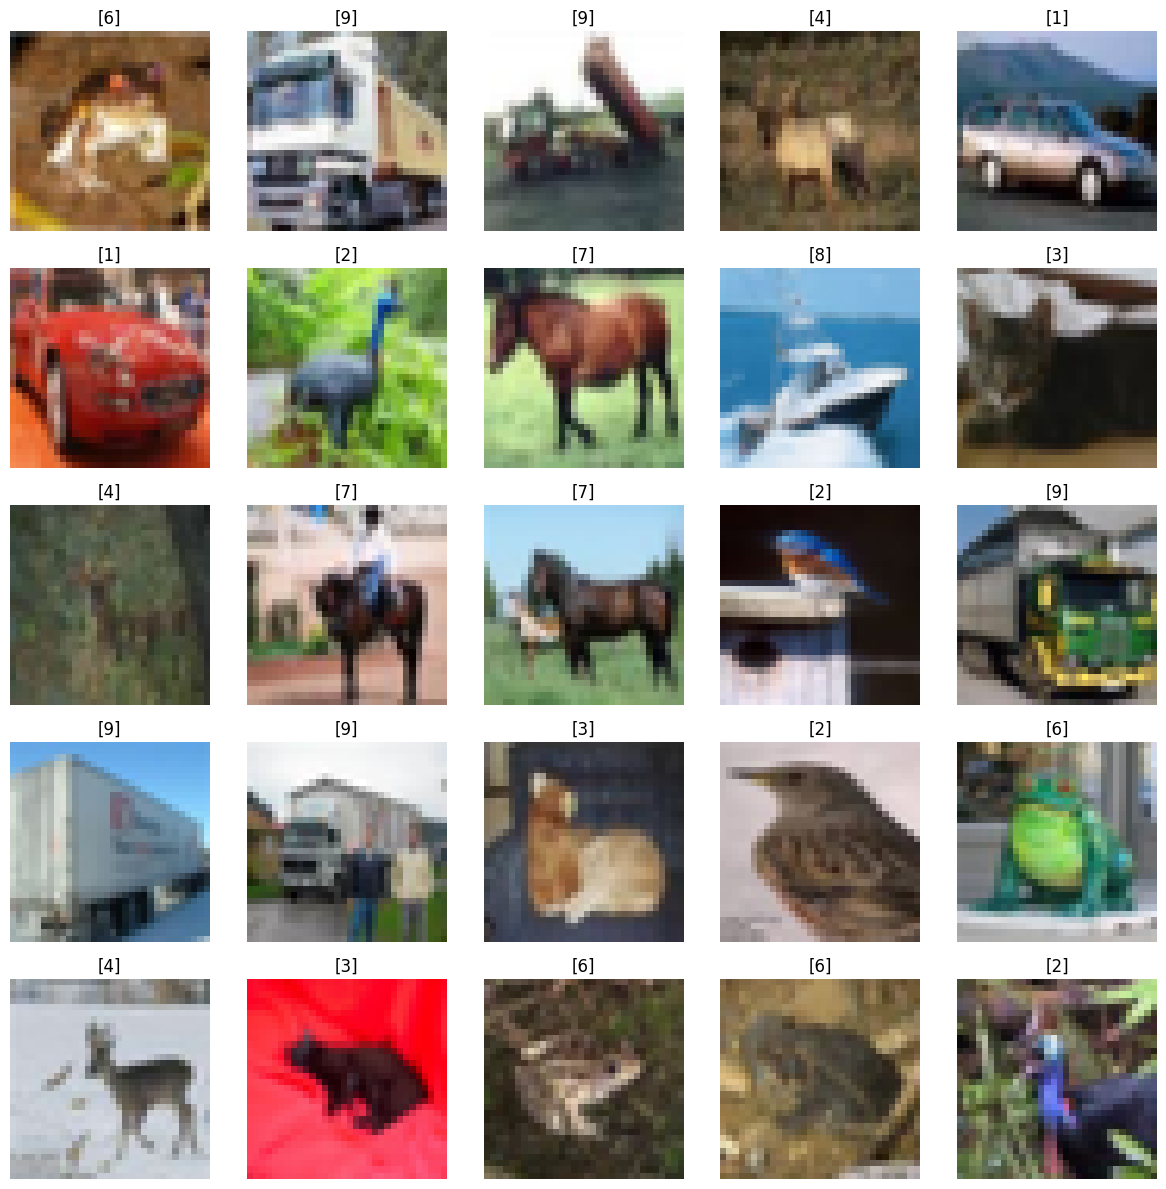

In [11]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 12))

# Display some images from the training set
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], interpolation='nearest')
    plt.title(train_labels[i])
    plt.axis('off')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()

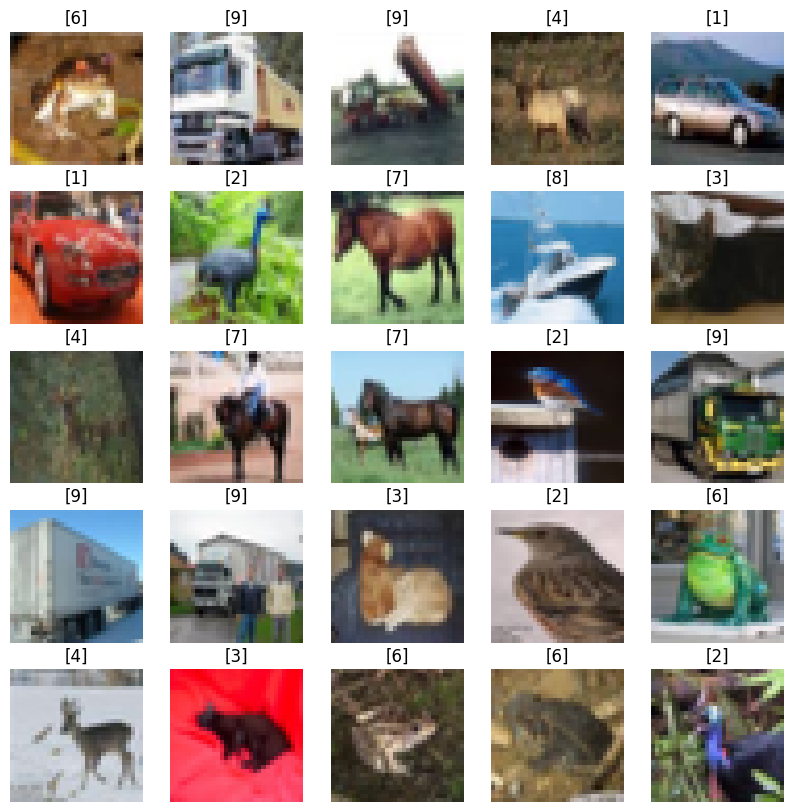

In [12]:
# Display some images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(train_labels[i])
    plt.axis('off')
plt.show()

In [13]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [16]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.5238 - accuracy: 0.4449 - val_loss: 1.2629 - val_accuracy: 0.5470
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1550 - accuracy: 0.5926 - val_loss: 1.0656 - val_accuracy: 0.6254
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0070 - accuracy: 0.6463 - val_loss: 1.0435 - val_accuracy: 0.6289
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9177 - accuracy: 0.6775 - val_loss: 0.9775 - val_accuracy: 0.6629
Epoch 5/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8385 - accuracy: 0.7069 - val_loss: 0.9314 - val_accuracy: 0.6775
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7848 - accuracy: 0.7244 - val_loss: 0.9048 - val_accuracy: 0.6803
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7370 - accuracy: 0.7410 - val_loss: 0.8594 -

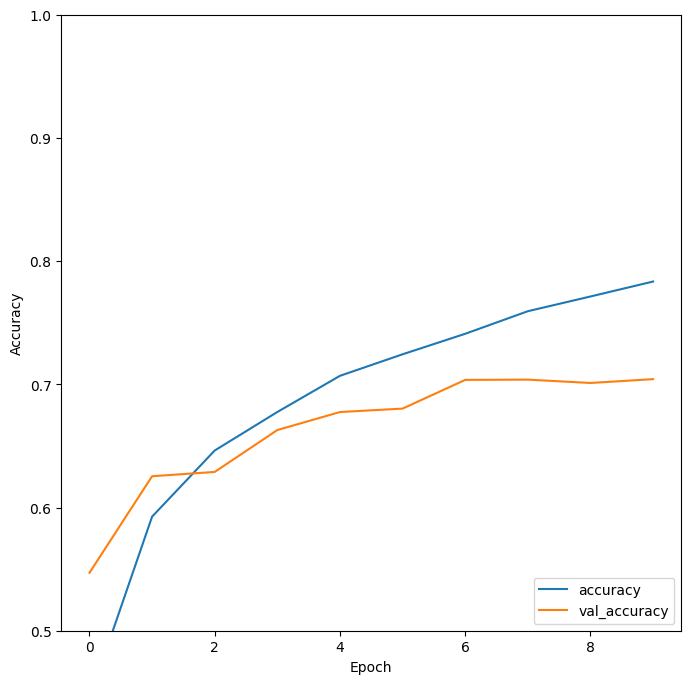

In [17]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.savefig("output_report.png")

In [18]:
 # Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 4s 13ms/step - loss: 0.8915 - accuracy: 0.7042
Test Loss: 0.8914593458175659
Test Accuracy: 0.704200029373169


313/313 [==============================] - 5s 16ms/step


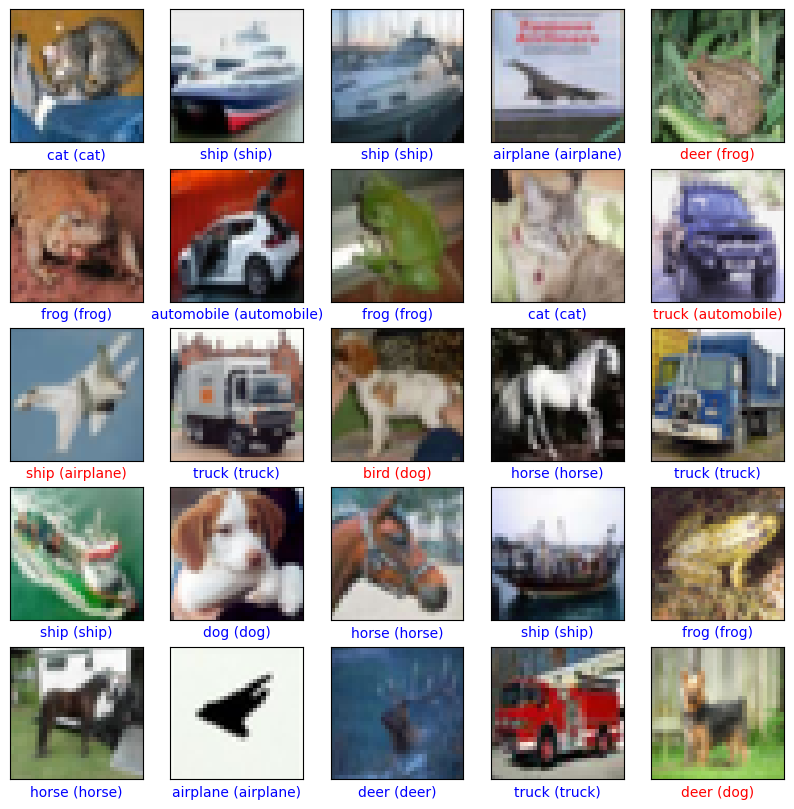

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Get model predictions for test images
predictions = model.predict(test_images)

# Plot some test images along with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i][0]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f'{class_names[predicted_label]} ({class_names[true_label]})', color=color)
plt.show()
